In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

In [5]:
moses = pd.read_csv('../../Data/raw/moses_v1.zip', compression='zip').drop('SPLIT', axis=1)
moses

,SMILES
0,CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1
1,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1
2,CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1
3,Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO
4,Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C
...,...
1936957,N#Cc1c(Br)cnc(N)c1Br
1936958,COC(=O)c1cc(CNC(=O)OC(C)(C)C)ccc1C
1936959,NC(=O)c1ccc2ccccc2c1Br
1936960,CC(=O)Nc1cccc(-c2nc3cc(C)ccc3[nH]c2=O)c1


In [9]:
x = pd.read_csv('../../Data/Data Analysis/Moses/descriptors.zip', compression='zip')['exactmw']

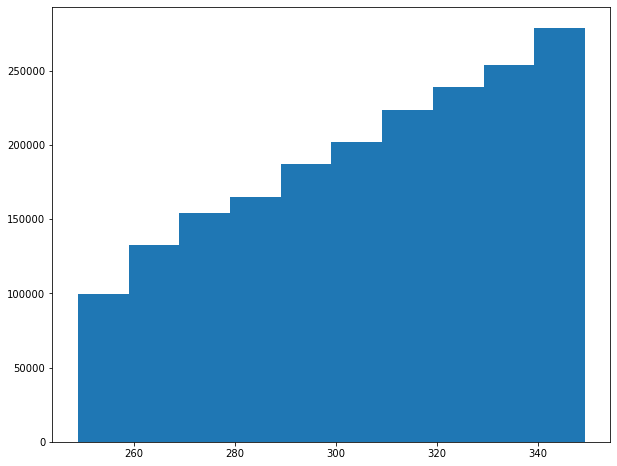

In [12]:
plt.figure(figsize=(10, 8))
plt.hist(x, bins=10)
plt.show()

In [ ]:
from collections import Counter

def atomic_distribution(series):
    atoms = []
    for mol in tqdm((Chem.MolFromSmiles(mol) for mol in series), total=series.size):
        for atom in mol.GetAtoms():
            atoms.append(atom.GetAtomicNum())
    return Counter(atoms)

atomic_distribution(moses['SMILES'])